In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Load the dataset from the file Ecommerce.csv

```
This dataset includes the following data for 200 online customers:

- Email
- Adress
- Avatar
- Avg Session Length (everage time they spent on usage)
- Time on App (time they spent using the application)
- Time on Website (time they spent using the website)
- Length of Membership (for how long they have been a user)
- Yearly Amount Spent (how much money they spend yearly)

Yout goal will be to estimate the value of the Yearly Amount Spent using the feature(s) of the users
```

### Get rid of non-numerical columns of the dataset

In [2]:
df = pd.read_csv('Ecommerce.csv')
df = df._get_numeric_data()
my_df = df

### Use Yearly Amount Spent as your target variable. Plot the relationship of each of the numerical features with the target variable

Text(18.0, 0.5, 'Yearly Amount Spent')

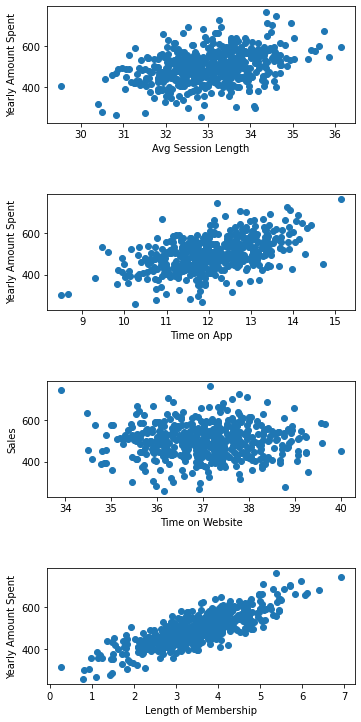

In [3]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(4, 1)
fig.set_figwidth(5)
fig.set_figheight(10)
fig.tight_layout(h_pad = 5)

axs[0].scatter(df['Avg Session Length'], df['Yearly Amount Spent'])
axs[0].set_xlabel('Avg Session Length')
axs[0].set_ylabel('Yearly Amount Spent')

axs[1].scatter(df['Time on App'], df['Yearly Amount Spent'])
axs[1].set_xlabel('Time on App')
axs[1].set_ylabel('Yearly Amount Spent')

axs[2].scatter(df['Time on Website'], df['Yearly Amount Spent'])
axs[2].set_xlabel('Time on Website')
axs[2].set_ylabel('Sales')

axs[3].scatter(df['Length of Membership'], df['Yearly Amount Spent'])
axs[3].set_xlabel('Length of Membership')
axs[3].set_ylabel('Yearly Amount Spent')

### Leave only one feature that has a linear relationship with the target variable.

In [4]:
df = df[['Length of Membership', 'Yearly Amount Spent']]
df

,Length of Membership,Yearly Amount Spent
0,4.082621,587.951054
1,2.664034,392.204933
2,4.104543,487.547505
3,3.120179,581.852344
4,4.446308,599.406092
...,...,...
495,3.746573,573.847438
496,3.576526,529.049004
497,4.958264,551.620145
498,2.336485,456.469510


### Divide the dataset into training and test sets with the ratio 80:20.

In [5]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(df[df.columns.difference(['Yearly Amount Spent'])],df['Yearly Amount Spent'], test_size=0.2, random_state=10)

In [6]:
import numpy as np

xTrain

,Length of Membership
305,5.566385
107,3.004743
350,3.827376
334,1.977007
142,3.914385
...,...
320,1.200484
15,3.357847
484,2.782758
125,4.531987


### Use the resulting train and test sets with the next 2 functions to fit linear regression and plot the resulting regression line.

The first function is `fit_1d_linear_regression` that takes two vectors $x$ and $y$, and returns a numpy array ($\beta_0, \beta_1)$, where $\beta_0$ is the intercept of the line, and $\beta_1$ is the slope. 

In [7]:
def fit_1d_linear_regression(data_vector, response_vector):
    """
    :param data_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is a data point (x)
    :param response_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is label (y)
    :return: numpy array beta of coefficients of the regression
    Note: You can avoid the intercept for simplicity
    """
    
    #TODO
    data_vector['ones'] = np.ones(data_vector.shape[0])
    data_vector = data_vector[['ones', 'Length of Membership']]
    return np.linalg.inv(data_vector.T.dot(data_vector)).dot(data_vector.T).dot(response_vector)

In [8]:
betta = fit_1d_linear_regression(xTrain,yTrain)
betta

array([272.99372552,  63.63094859])

The second function is `plot_line` function, that takes $\beta_0, \beta_1, x, y$ and plots a scatter plot of the data, and the line $y = \beta_0 + \beta_1 x$. And saves the plot in `YOURNAME.png`

In [9]:
def plot_fitted_line(b0: float,
                     b1: float,
                     x,
                     y,
                     username: str):
    """
    :param b0: Intersept of line to plot
    Note: avoid this if you don't have an intercept in the previous function
    :param b1: Slope of the line to plot
    :param x: A pandas series object (i.e. a column of a dataframe),
                        where each element is a data point (x coordinates)
    :param y: A pandas series object (i.e. a column of a dataframe),
                        where each element is a label (y coordinates)
    """
    y_pred = b0+b1*x
    plt.scatter(x, y,  color='black')
    plt.plot(x, y_pred, color='blue', linewidth=3)
     
 

    plt.xticks(())
    plt.yticks(())
    plt.savefig(username)
    plt.show()

In [10]:
y_pred = betta[0]+betta[1]*xTest

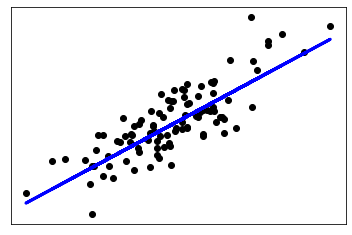

In [11]:
plot_fitted_line(betta[0],betta[1],xTest,yTest,'YOURNAME.png')

### Plot example

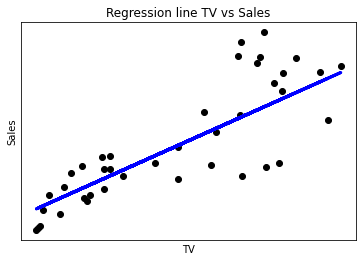

### Now fit the linear regression to the data containing only 1 feature using sklearn and compare the results with your own fit_1d_linear_regression function

In [12]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(xTrain, yTrain)
regr.coef_, regr.intercept_ 

(array([63.63094859,  0.        ]), 272.99372551661463)

### Use sklearn.metrics to calculate Mean absolute error, Mean squared error, Root mean squared error and R-squared for the results of your own function vs the sklearn regression results. Try to interprete your results.

In [13]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean absolute error: %.2f'
      % mean_absolute_error(yTest, y_pred))

print('Mean squared error: %.2f'
      % mean_squared_error(yTest, y_pred))

print('Root mean squared error: %.2f'
      % np.sqrt(mean_squared_error(yTest, y_pred)))

print('R-squared: %.2f'
      % r2_score(yTest, y_pred))


Coefficients: 
 [63.63094859  0.        ]
Mean absolute error: 40.07
Mean squared error: 2303.98
Root mean squared error: 48.00
R-squared: 0.66


### Fit linear regression to the data containing all numerical features using sklearn and use the same metrics to evaluate how good the model is.

In [14]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(my_df[my_df.columns.difference(['Yearly Amount Spent'])],df['Yearly Amount Spent'], test_size=0.2, random_state=42)
regr = linear_model.LinearRegression()

regr.fit(xTrain, yTrain)

y_pred = regr.predict(xTest)
regr.coef_, regr.intercept_ 

(array([25.5962591 , 61.89682859, 38.78534598,  0.31038593]),
 -1044.2574146365585)

### Implement K-fold Cross Validation

In [15]:
def div(data ,i ,k=5):
    data = data.sample(frac = 0.5)
    n = data.shape[0] // k
    if (i != k):
        return data[(i-1) * n:i * n] ,data[0 : (i - 1) * n].append(data[i * n:])
    else:
        return data[(i-1)*n:],data[:(i-1)*n]
    
       

In [16]:
def k_fold(data ,k = 5):
    r2 = []
    for i in range(k):
        data_test,data_train = div(data,i+1,k)
        x_test,y_test = data_test[data_test.columns.difference(['Yearly Amount Spent'])],data_test['Yearly Amount Spent']
        x_train,y_train = data_train[data_train.columns.difference(['Yearly Amount Spent'])],data_train['Yearly Amount Spent'] 

        regr = linear_model.LinearRegression()
        regr.fit(x_train, y_train)
        y_pred = regr.predict(x_test)

        r2.append(r2_score(y_test, y_pred))
    return np.mean(r2),r2

### Evaluate model with K-fold

In [17]:
k_fold(df,5)[0]

0.6707130619481471